# Homework 3: Gaussian Process Regression

In [2]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sla

In [3]:
#Pre-processing
data_size = 100
x = np.zeros(data_size, dtype=float)
y = np.zeros(data_size, dtype=float)
counter = 0
with open('gp.dat') as file:
    for line in file:
        data = line.split()
        x[counter] = data[0]
        y[counter] = data[1]
        counter += 1

In [4]:
#Define k:
def k(x_i, x_j, tau_sq):
    val = -((x_i - x_j)**2)/(2*tau_sq)
    return np.exp(val)

In [5]:
#Plot random test points
num_pts = 50
z = np.linspace(0, 1, num_pts)
mu = np.zeros(num_pts)
sigma = np.ndarray((num_pts, num_pts), dtype=float)
tau_sq = 0.12
for i  in range(num_pts):
    for j in range(num_pts):
        sigma[i][j] = k(z[i], z[j], tau_sq)

num_samples = 20
samples = np.random.multivariate_normal(mu, sigma, num_samples)

Text(0.5, 1.0, 'Prior Data')

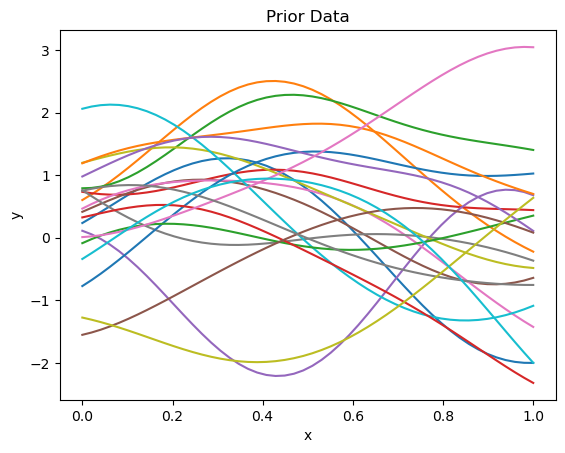

In [6]:
#Plot the random functions
fig, ax = plt.subplots()
for i in range(num_samples):
    ax.plot(z, samples[i])
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Prior Data")

Text(0.5, 1.0, '$gp.dat$ Data')

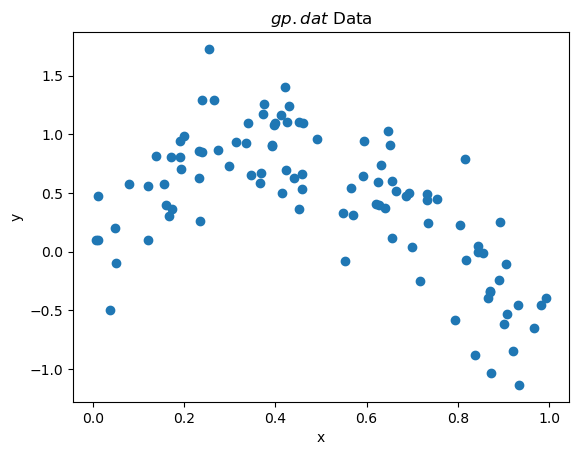

In [7]:
#Plot the points
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("$gp.dat$ Data")

In [54]:
K = np.ndarray((data_size, data_size), dtype=float)
for i in range(data_size):
    for j in range(data_size):
        K[i][j] = k(x[i], x[j], tau_sq)
        
